# Introduction to Data Science 
# Lecture 14: Classification 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll discuss:
* a general overview of classification 
* logistic regression 
* k nearest neighbors (k-NN) 
* generalizability and cross validation 

Recommended Reading: 
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 4 [digitial version available here](http://www-bcf.usc.edu/~gareth/ISL/)
* A. Géron, Hands-On Machine Learning with Scikit-Learn and TensorFlow, Ch. 3


In [3]:
# imports and setup
import scipy as sc
import pandas as pd
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Classification 

Recall that in **regression**, we try to predict a real-valued (quantitative) variable. Examples:
1. Predict house prices based on attributes
+ predict credit score rating based on income, balance, gender, education, etc...

In **classification**, we try to predict a categorical (qualitative) variable. Examples:
1. Predict whether a bank should issue a person a credit card (yes/no)
+ Predict a hospital patient's diagnosis (stroke, heart attack,...) based on symptoms. 

**Data:** $n$ samples $(x_1,y_1), (x_2,y_2),\ldots,(x_n,y_n)$, where $x_i$ are attributes or features and $y_i$ are categorical variables that you want to predict. 

**Goal:** Develop a rule for predicting the categorical variable $y$ based on the features $x$. 

**Example:** Can the number of hours a student studies predict whether they will pass the exam?

**Example:** Can we predict whether or not a student will be admitted to a graduate program based on their undergraduate performance (GPA, GRE score, prestige of student's undergraduate university)? 

**Example:** The post office uses classification to automatically sort mail by zip code. The digits of the zip code are assigned to one of the *classes:* $0,1,2,\ldots,9$. 

In the next couple lectures, we'll cover several classification methods:
* logistic regression
+ k nearest neighbors
+ trees and random forests
+ support vector machines (SVM) 

After spring break, we'll cover yet another method:
* Neural Networks and Deep Learning

We'll see that Neural Networks can be used for both regression and classification. 


### Evaluating a classification method

Recall that in regression methods, we had several methods for evaluating a particular model: 
- $R^2$ value
- hypothesis tests associated with the model and individual predictor variables

How can we evaluate the performance of a classification method? 

**Confusion Matrix**. The [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is a table where each column of the matrix represents the number of samples in each predicted class and each row represents the number of samples in each actual class. 

Consider the results from a classifier that is trying to classify 27 images of cats, dogs, and rabbits. Here is an example of what the confusion matrix might look like

<img src="ConfusionMatrix.png" title="https://en.wikipedia.org/wiki/Confusion_matrix" width="35%">

This classifier is very good at distinguishing between cats and rabbits but lousy at recognizing dogs...half are misclassified!


**Precision vs. Recall.** Two key metrics that can be obtained from the confusion matrix for binary classification are [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall):
\begin{align*}
\textrm{precision} &= \frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}}\\
\textrm{recall} &= \frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}}
\end{align*}
Here, TP is the number of true positives, FP is the number of false positives, and FN is the number of false negatives.

Often, precision and recall are inversely related; it is not possible to increase one without decreasing the other. For example, a trivial way to have perfect precision (precision = 1 = 100%) is if you make one correct positive prediction. However, this is not very useful since there will be many false negatives, so recall will be low. Conversely, if you can make one correct negative prediction, recall will be 100%, while precision will be very low.  

In a particular application, it might be more desirable to have either better precision or recall. 

<img src="BinaryConfusinoMatrix.png" title="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62" width="55%">

There have been some attempts to combine precision and recall into a single measure, such as the [F-measure](https://en.wikipedia.org/wiki/Precision_and_recall#F-measure), which is the harmonic mean of precision and recall:
$$
\textrm{F-measure} = 2\frac{ \textrm{precision} \cdot \textrm{recall} }{\textrm{precision} + \textrm{recall}}.
$$
The F-measure is large if precision and recall are close. 

The [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) further illustrates the trade-off between precision and recall. 


The [Jaccard similarity score](https://en.wikipedia.org/wiki/Jaccard_index) is another measure of accuracy, given by 
$$
\textrm{J} = \frac{\textrm{TP}}{\textrm{TP} + \textrm{FP} + \textrm{TN}}.
$$

## Logistic regression 

In logistic regression, the categorical value, $Y$, that we predict only takes two values. We'll call them 0 and 1. 

**Main idea:** Given the predictor variable  X, we model the *probability* that $Y = 1$ by 
$$
p(X) = p(Y = 1 | \ X) = \frac{e^{\beta_0 + \beta_1 X}}{1+ e^{\beta_0 + \beta_1 X}}
$$

Defining the *logistic function* or *sigmoid function*,  
$$
\textrm{logistic}(x) := \frac{e^x}{1 + e^x} = \frac{1}{1+ e^{-x}},
$$
we can write the above expression more succinctly as 
$$
p(X) = \textrm{logistic}( \beta_0 + \beta_1 X ).  
$$

One can check that the model is equivlant to 
$$
\log \left( \frac{p(X)}{1-p(X)} \right) = \beta_0 + \beta_1 X. 
$$

Sometimes, the function on the left hand side of the above equation is called the *logit function*, 
$$
\textrm{logit}(p) := \log \left( \frac{p}{1-p} \right). 
$$
We can equivalently write the model as 

$$
\textrm{logit} ( p(X) ) = \beta_0 + \beta_1 X.  
$$
It follows that the logistic and logit functions are inverses of each other. 

We interpret $\frac{p(X)}{1-p(X)}$ as being the *odds* that $Y=1$. Note that $p(X)$ is a number between 0 and 1 so that the odds that $Y=1$ is a number between 0 and $\infty$. If $p(X) = 0.5$, then odds = 1.  We also have that $\textrm{logit} ( p(X) )$ is a number between $-\infty$ and $\infty$, so it makes sense that it could be linear in the data (as modeled). 


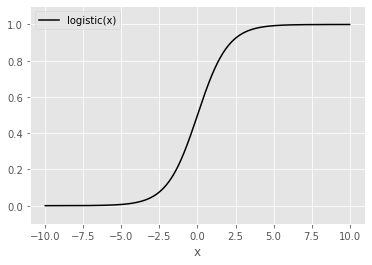

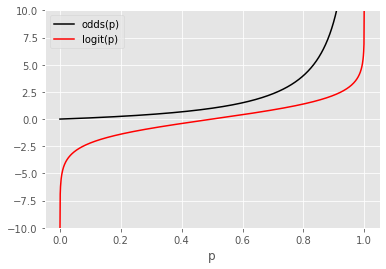

In [9]:
x = sc.linspace(-10,10,1000)
logistic = lambda x: 1/(1+sc.exp(-x))
plt.plot(x,logistic(x),color='black',label='logistic(x)')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylim(-.1,1.1)
plt.show()

p = sc.linspace(1e-5,1-1e-5,1000)
odds = lambda p: p/(1-p)
logit = lambda p: sc.log(odds(p))
plt.plot(p,odds(p),color='black',label='odds(p)')
plt.plot(p,logit(p),color='red',label='logit(p)')
plt.legend(loc='upper left')
plt.xlabel('p')
plt.ylim(-10,10)
plt.show()

**Logistic regression:** Given samples $(x_i,y_i)$ for $i=1,\ldots,n$, find the *best* values of $\beta_0$ and $\beta_1$ so that 
$$
y = \textrm{logistic}( \beta_0 + \beta_1 X ) 
\qquad \textrm{or} \qquad
\textrm{logit} ( y ) = \beta_0 + \beta_1 X.  
$$
Recall that in linear regression, we found the the coefficients $\beta_0$ and $\beta_1$ by setting up the sum of the squared residuals $\ell(\beta_0,\beta_1) = \sum_{i} (y_i - \beta_0 - \beta_1 x_i)^2$, setting the partial derivatives with respect to  $\beta_0$ and $\beta_1$ to zero, and solving for  $\hat \beta_0$ and $\hat \beta_1$. 
We can try to do the same thing here, but unlike linear regression, there is no longer a closed form solution for the best coefficients $\hat \beta_0$ and $\hat \beta_1$. We have to use a computer to find them. To do this, we maximize the likelihood function 
$$
\ell(\beta_0,\beta_1) = \Pi_{i\colon y_i = 1} p(x_i) \ \Pi_{j\colon y_j = 0} (1- p(x_j)).
$$

**Statistical inference viewpoint:** 
Above, logistic regression was described from the explanatory viewpoint of finding the best parameters to describe the data. 
Just like as in regression, there is also a statistical inference viewpoint. The categorical variable is modeled as 
$$
y = \begin{cases}
1 &  \beta_0 + \beta_1 x + \varepsilon > 0 \\
0 & \text{otherwise}
\end{cases}
$$
where $\varepsilon$ is a random variable that is distributed according to the logistic distribution. Here, we seek to infer the values of $\beta_0$ and $\beta_1$ from noisy samples of this variable. 

## Logistic Regression Example:  How many hours do you need to study to pass the exam? 

This example was taken from [wikipedia](https://en.wikipedia.org/wiki/Logistic_regression). 

In [5]:
hours = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50] 
pass_Exam = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
df = pd.DataFrame({"hours": hours, "pass_exam": pass_Exam})
df

,hours,pass_exam
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


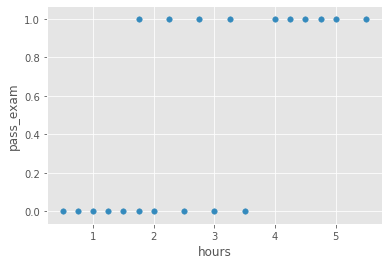

In [6]:
df.plot.scatter(x='hours',y='pass_exam',s=30);

For this example, we want to find coefficients $\beta_0$ and $\beta_1$ so that the model
$$
p(X) = \textrm{probability}(\textrm{passing} | \ \textrm{X hours studying} ) = \textrm{logistic}( \beta_0 + \beta_1 X )
$$
best explains the data. 

We can use the 'logit' function from the statsmodels python library. 

In [7]:
exam_model = sm.logit(formula="pass_Exam ~ hours", data=df).fit()
exam_model.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              pass_Exam   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Feb 2020   Pseudo R-squ.:                  0.4208
Time:                        16:25:09   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

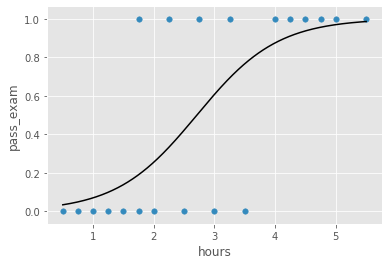

In [8]:
df.plot.scatter(x='hours',y='pass_exam',s=30)
x = sc.linspace(df['hours'].min(),df['hours'].max(),1000)
par = dict(exam_model.params)
plt.plot(x,logistic(par['Intercept'] + par['hours']*x),color='Black')
plt.show()

The plot shows hours vs. whether or not the student passed and the logistic regression curve. The curve predicts the probability that a student will pass, given how many hours they've studied. 

From the plot, we can see that the more hours you spend studying, the more likely you are to pass the exam. *Let this be a lesson!* 

If I study just 2 hours, what is the likelihood that I'll pass? 

In [10]:
logistic(par['Intercept'] + par['hours']*6)

0.9929675242040855

I can also get this from exam_model:

In [11]:
exam_model.predict(pd.DataFrame({"hours": [2]}))

0    0.255703
dtype: float64

After studying just 2 hours, I'm only $26\%$ likely to pass. 

How many hours do you have to study in order for the probability of passing to be greater than $50\%$?

From the plot, it looks like $\approx 2.75$ hours. How can we find this number from the logistic regression? 

Recall: 
$$
p(X) = \textrm{logistic}( \beta_0 + \beta_1 X ).  
$$

In [9]:
prob_passing = 0.5
print((logit(prob_passing) - par['Intercept'])/par['hours'])

2.7100826242472498


We can also make a confusion matrix for the model: 

In [10]:
df['pred_pass'] = exam_model.predict()>.5
pd.crosstab(index=df["pass_exam"], columns=df["pred_pass"]) # confusion matrix

pred_pass,False,True
pass_exam,,
0,8,2
1,2,8


We interpret this as: for each category (pass,fail), there were two mistakenly classified points. 

**Question**: What is the precision and recall for this model?

\begin{align*}
\textrm{precision} &= \frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}} = \frac{8}{8 + 2} = 80\% \\
\textrm{recall} &= \frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}} =  \frac{8}{8 + 2} = 80\%
\end{align*}